<a href="https://colab.research.google.com/github/rktummalapenta/PractiseCodes/blob/master/Face_Recognition_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform Facial Recognition with Deep Learning in Keras Using CNN Course-end Project 4

DESCRIPTION

Problem Statement: Facial recognition is a biometric alternative that measures unique characteristics of a human face. Applications available today include flight check in, tagging friends and family members in photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a face recognition programme with deep convolutional neural networks. Objective: Use a deep convolutional neural network to perform facial recognition using Keras. Dataset Details: ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images per person. The images were taken at different times, lighting and facial expressions. The faces are in an upright position in frontal view, with a slight left-right rotation. Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0 Prerequisites: Keras Scikit Learn Steps to be followed:

Input the required libraries
Load the dataset after loading the dataset, you have to normalize every image.
Split the dataset
Transform the images to equal sizes to feed in CNN
Build a CNN model that has 3 main layers:
i. Convolutional Layer ii. Pooling Layer iii. Fully Connected Layer

Train the model
Plot the result
Iterate the model until the accuracy is above 90%

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

import itertools

Loading ORL_faces.npz data and normalize the sizes of images for model training.

In [10]:
#load dataset
data = np.load('ORL_faces.npz')

# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print(f"x_train : {x_train[:]}")
print(f"Y_train shape: {y_train}")
print(f"x_test: {x_test.shape}")

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

# New Section

Splitting the normalized data using sklearn train and test split method

In [11]:
x_train, x_valid, y_train, y_valid= train_test_split(x_train, y_train, test_size=.05, random_state=42,)

In [12]:
rows=112
cols=92
batch_size=512
shape=(rows, cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *shape)
x_test = x_test.reshape(x_test.shape[0], *shape)
x_valid = x_valid.reshape(x_valid.shape[0], *shape)


print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"x_valid shape: {x_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")

x_train shape: 228
x_test shape: (160,)


In [13]:
# Build a CNN model that has 3 main layers: i. Convolutional Layer ii. Pooling Layer iii. Fully Connected Layer
cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax')
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 53, 43, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 19, 54)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 24624)             0         
                                                                 
 dense (Dense)               (None, 2024)              4

In [15]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/250
1/1 - 11s - loss: 3.0018 - accuracy: 0.0482 - val_loss: 2.9897 - val_accuracy: 0.0833 - 11s/epoch - 11s/step
Epoch 2/250
1/1 - 13s - loss: 3.0017 - accuracy: 0.0395 - val_loss: 2.9886 - val_accuracy: 0.0833 - 13s/epoch - 13s/step
Epoch 3/250
1/1 - 13s - loss: 3.0018 - accuracy: 0.0746 - val_loss: 2.9909 - val_accuracy: 0.0833 - 13s/epoch - 13s/step
Epoch 4/250
1/1 - 15s - loss: 2.9886 - accuracy: 0.0614 - val_loss: 2.9953 - val_accuracy: 0.0833 - 15s/epoch - 15s/step
Epoch 5/250
1/1 - 9s - loss: 3.0019 - accuracy: 0.0658 - val_loss: 2.9958 - val_accuracy: 0.0833 - 9s/epoch - 9s/step
Epoch 6/250
1/1 - 9s - loss: 2.9900 - accuracy: 0.0351 - val_loss: 2.9946 - val_accuracy: 0.0833 - 9s/epoch - 9s/step
Epoch 7/250
1/1 - 12s - loss: 2.9815 - accuracy: 0.0746 - val_loss: 2.9928 - val_accuracy: 0.0000e+00 - 12s/epoch - 12s/step
Epoch 8/250
1/1 - 11s - loss: 2.9820 - accuracy: 0.0702 - val_loss: 2.9911 - val_accuracy: 0.0000e+00 - 11s/epoch - 11s/step
Epoch 9/250
1/1 - 11s - loss: 

In [18]:
# CNN model evaluation using x_test and y_test
score = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

Test Loss: 0.29496198892593384
Test Accuracy: 0.9375


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


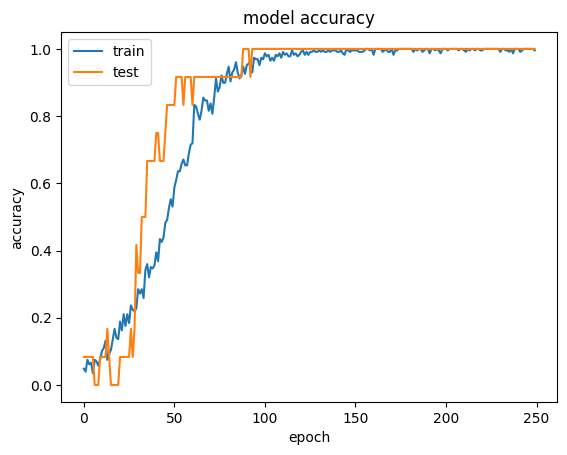

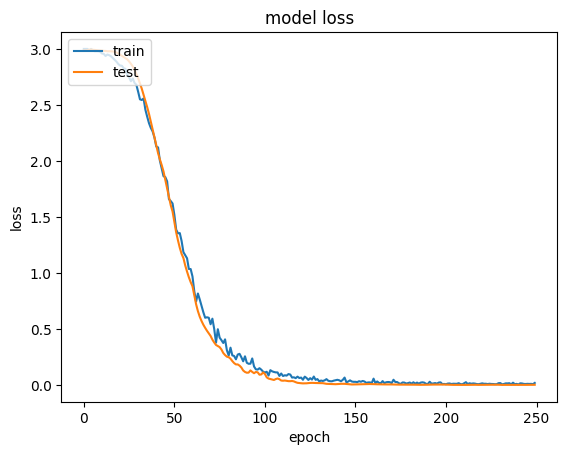

In [21]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
predicted =np.array( cnn_model.predict(x_test))

predict_x=cnn_model.predict(x_test)
ypred=np.argmax(predict_x,axis=1)

accuracy=accuracy_score(y_test, ypred)
print(f"accuracy : {accuracy}")

cnf_matrix=confusion_matrix(np.array(y_test), ypred)
y_test1 = np_utils.to_categorical(y_test, 20)

5/5 [==============================] - 1s 284ms/step
accuracy : 0.9375


In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [30]:
print('Confusion matrix, without normalization')
print(cnf_matrix)



Confusion matrix, without normalization
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]


Confusion matrix, without normalization


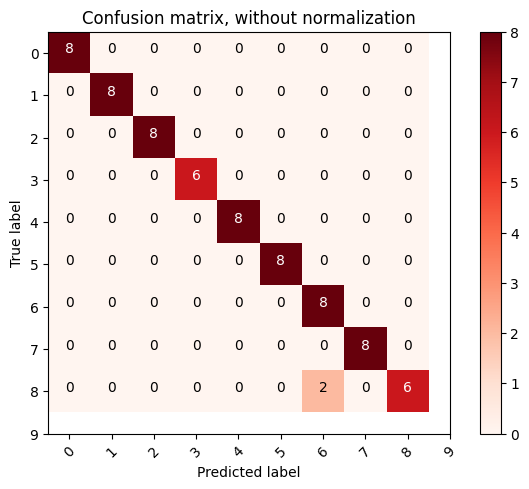

In [31]:
plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')



Confusion matrix, without normalization


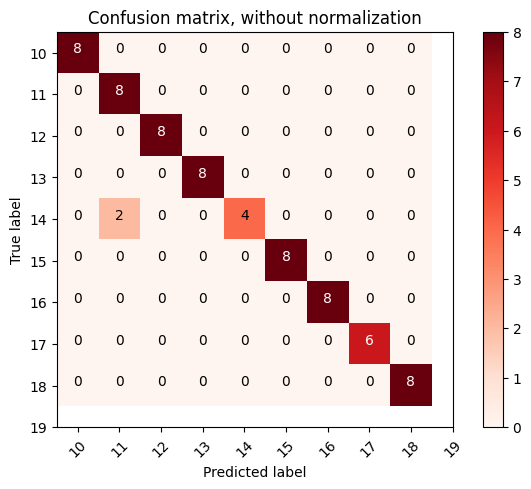

In [32]:
plt.figure()
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')



In [34]:
print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ypred))

Confusion matrix:
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]


In [35]:
print(classification_report(np.array(y_test), ypred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      0.75      0.86         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       0.67      1.00      0.80         8
           8       1.00      1.00      1.00         8
           9       1.00      0.75      0.86         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       0.80      1.00      0.89         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      0.50      0.67         8
          16       1.00      1.00      1.00         8
          17       0.80    